In [1]:
!pip install opencv-python

In [3]:
import cv2
import numpy as np
image = cv2.imread('/content/drive/MyDrive/shibe/shibe.jpg')

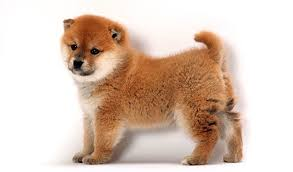

-1

In [4]:
# loading and displaying the image
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey()

In [5]:
# checking the data structure
print(image.shape)
print(image.size)
print(type(image))

(172, 293, 3)
151188
<class 'numpy.ndarray'>


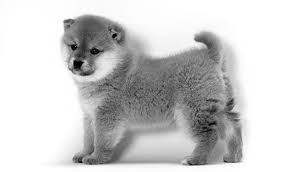

In [6]:
# converting to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

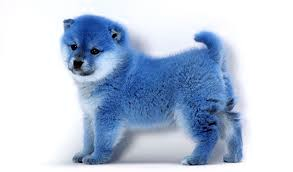

In [7]:
 # converting the image color space BGR to RGB.
 rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [8]:
# saving the image from jpg to png format
cv2.imwrite('/content/drive/MyDrive/shibe/shibe.jpg', rgb, [cv2.IMWRITE_PNG_COMPRESSION])

True

**Image Translation**

In [9]:
# shifting an image into a frame
num_rows, num_cols = image.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)

Displaying the translated image

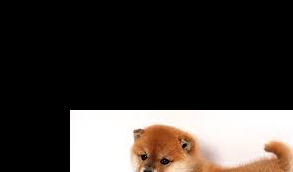

In [10]:
cv2_imshow(img_translation)

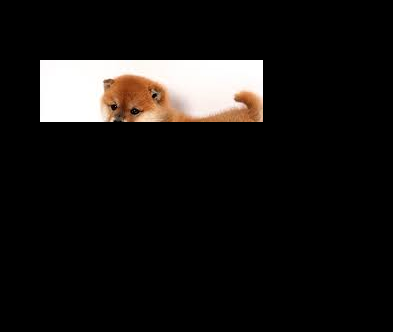

In [11]:
# setting the image without cropping the image in the middle of the frame
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols + 70 + 30, num_rows + 110 + 50))
cv2_imshow(img_translation)

**Image Rotation**

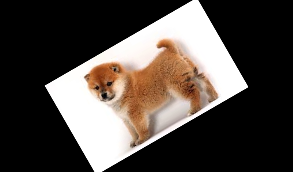

In [12]:
# rotating the image by a certain angle
img_rotation = cv2.warpAffine(image, cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 0.6), (num_cols, num_rows))
cv2_imshow(img_rotation)

**Image Scaling**

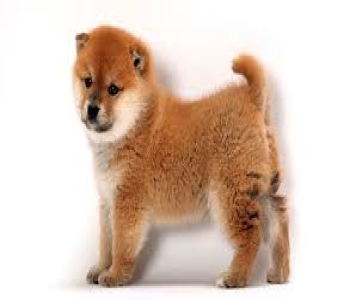

In [13]:
# resizing the image according to the requirement
img_shrinked = cv2.resize(image,(350, 300), interpolation = cv2.INTER_AREA)
cv2_imshow(img_shrinked)

**Enlarging the image size**

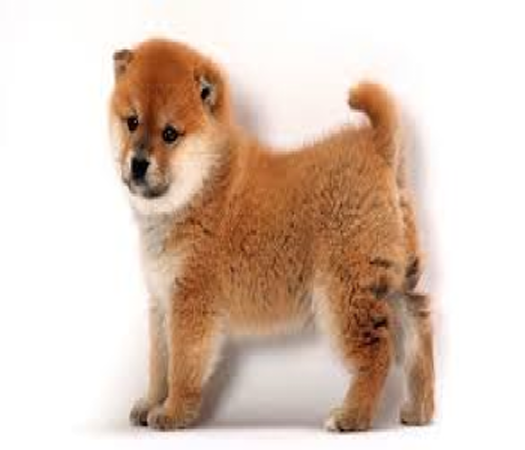

In [15]:
img_enlarged = cv2.resize(img_shrinked,None,fx=1.5, fy=1.5, interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_enlarged)

**Image Transformation Types**

**Affine Transformation**

In [16]:
# It works by preserving the lengths and angles
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(num_cols-1)),0], [int(0.4*(num_cols-1)),num_rows-1]])
matrix = cv2.getAffineTransform(src_points, dst_points)
img_afftran = cv2.warpAffine(image, matrix, (num_cols,num_rows))

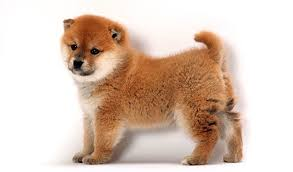

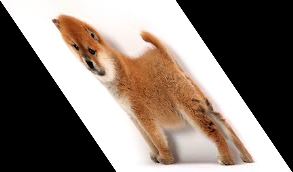

In [17]:
# Displaying the image and transformed image.
cv2_imshow(image)
cv2_imshow(img_afftran)

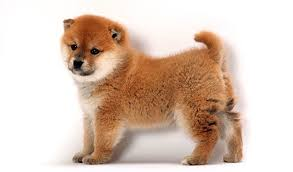

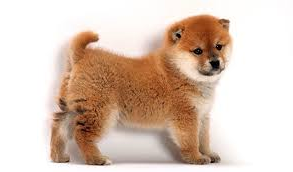

In [18]:
# making a mirror image of the original image
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1]])
dst_points = np.float32([[num_cols-1,0], [0,0], [num_cols-1,num_rows-1]])
matrix = cv2.getAffineTransform(src_points, dst_points)
img_afftran = cv2.warpAffine(image, matrix, (num_cols,num_rows))
cv2_imshow(image)
cv2_imshow(img_afftran)

**Projective Transformation**

In [19]:
# It works on the projective view option where we see an object from its every plane
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1], [num_cols-1,num_rows-1]])
dst_points = np.float32([[0,0], [num_cols-1,0], [int(0.33*num_cols),num_rows-1], [int(0.66*num_cols),num_rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_protran = cv2.warpPerspective(image, projective_matrix, (num_cols,num_rows))

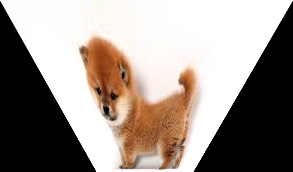

In [20]:
cv2_imshow(img_protran)

**Image Wrapping**

In [23]:
import math
rows, cols = image.shape[:2]

# Vertical wave 

img_output = np.zeros(img_afftran.shape, dtype=image.dtype) 
for i in range(rows): 
    for j in range(cols): 
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180)) 
        offset_y = 0 
        if j+offset_x < rows: 
            img_output[i,j] = img_afftran[i,(j+offset_x)%cols] 
        else: 
            img_output[i,j] = 0 

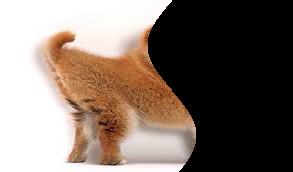

In [24]:
# Displaying the image.

cv2_imshow(img_output)